



<font size=5 > <p style="color:purple"> Health Insurance Pricing using Machine Learning

In health insurance pricing, there are a lot of factors that may affect the premium price such as age, sex, bmi, number of children, smoking status and region.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  # for heatmap visualization and more
from sklearn.model_selection import GridSearchCV # hyperparameter tuning
import warnings
import xgboost as xgb
import sklearn.metrics as sm

# Data Collection Section

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df = pd.read_csv('/content/drive/MyDrive/fyp1 2210 fyp2 2220 shared editable Shuhail Azri/insurance.csv')
df.head(5)

# collected dataset from here: https://data.world

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA Section

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

0 missing values were identified.

Text(0.5, 1.0, 'Distribution of Prices')

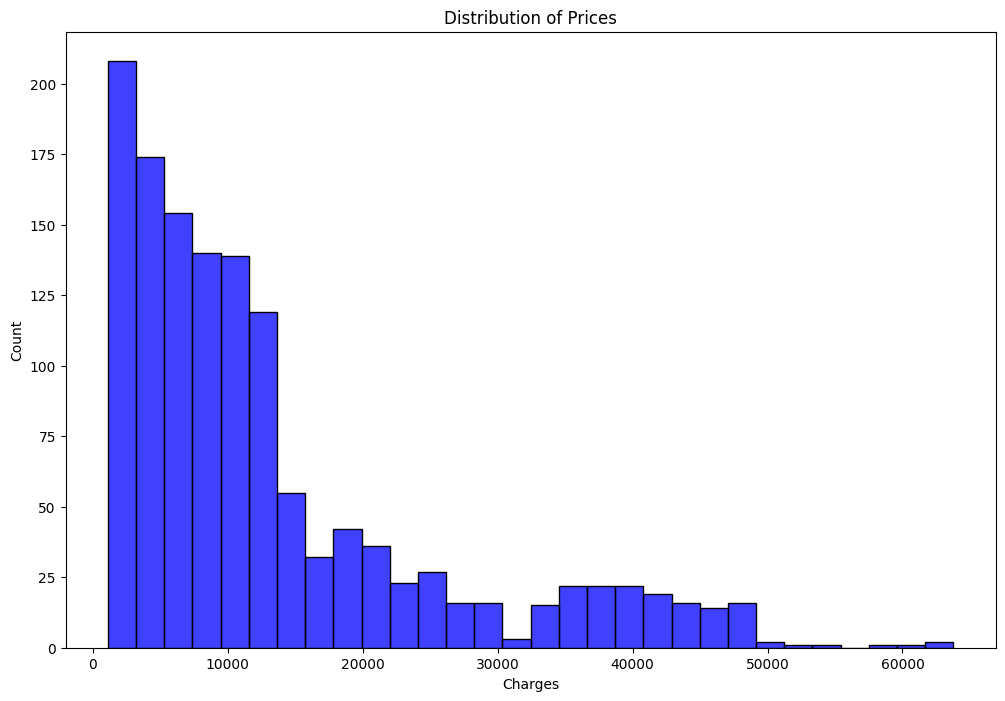

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.histplot(df['charges'], color = 'b')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Distribution of Prices')

This is distribution is skewed to right which means many customer pay less than 20000.

Text(0.5, 1.0, 'Age vs Charges')

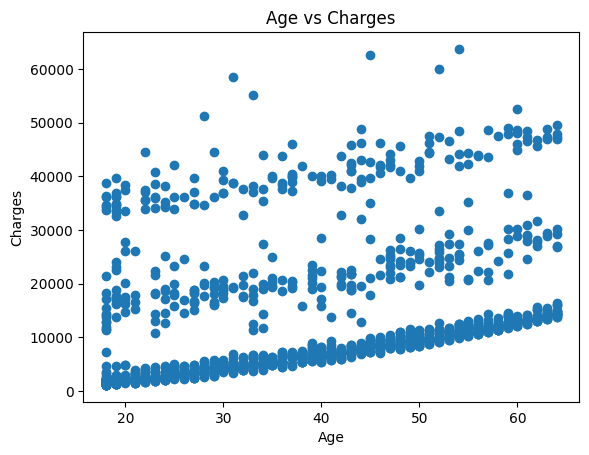

In [ ]:
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')

This age vs charges plot shows that higher age would be having higher pricing.

Text(0.5, 1.0, 'Premium Prices against Region')

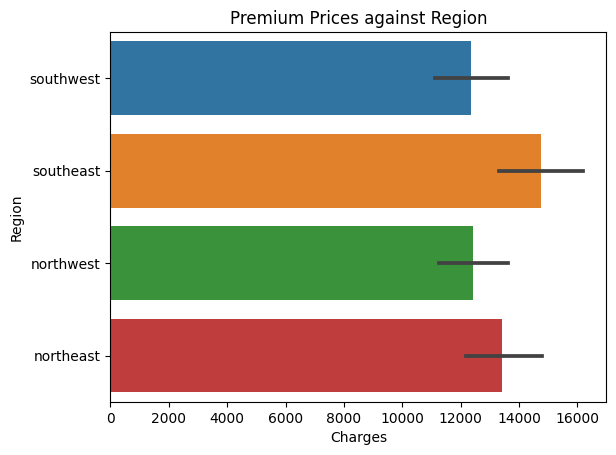

In [ ]:
sns.barplot(x = 'charges' ,y = 'region', data = df)
plt.xlabel('Charges')
plt.ylabel('Region')
plt.title('Premium Prices against Region')

Highest health insurance price are in the Southeast and the lowest are in the Southwest and Northwest.

Text(0.5, 1.0, 'Premium Prices against Region and Sex')

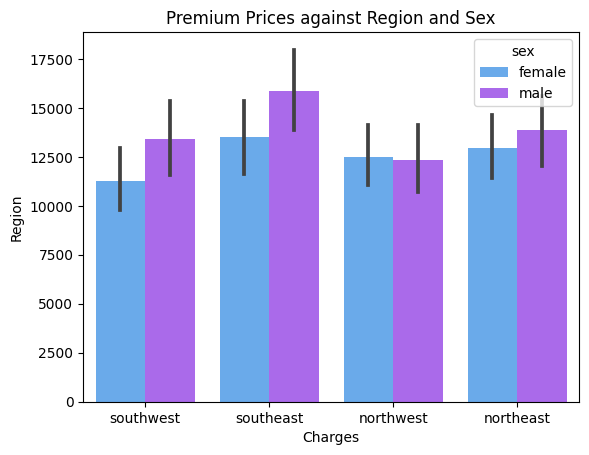

In [ ]:
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')
plt.xlabel('Charges')
plt.ylabel('Region')
plt.title('Premium Prices against Region and Sex')

The highest prices are in the southeast for male and female but the lowest are in the southwest for female and northwest for male.

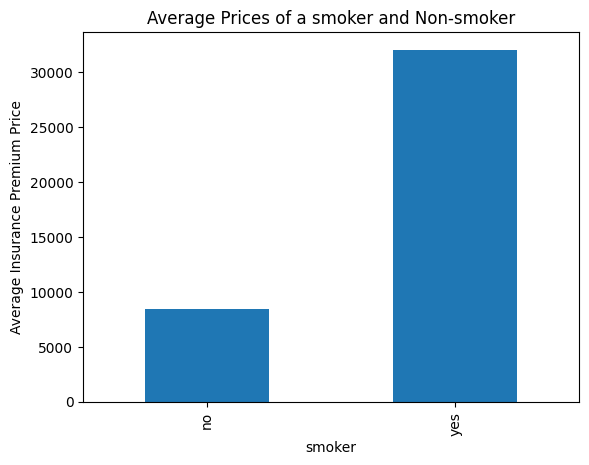

In [ ]:
df.groupby(['smoker'])['charges'].mean().plot.bar()
plt.ylabel('Average Insurance Premium Price')
plt.title("Average Prices of a smoker and Non-smoker")
plt.show()

A smoker has a way higher insurance premium price than a non smoker on average.

Text(0.5, 1.0, 'BMI vs Charges')

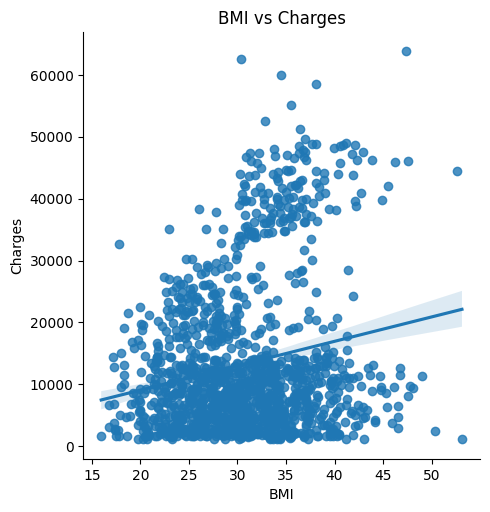

In [ ]:
sns.lmplot(x = 'bmi', y = 'charges', data=df, palette='Set1')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')

Higher BMI would be resulting in a higher prices as visualized by the line of lmplot.

Text(0.5, 1.0, 'BMI vs Charges in addition to Smoking status')

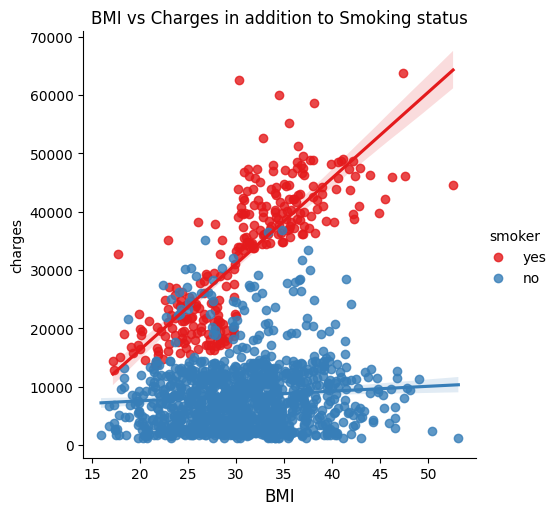

In [ ]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set1')
plt.xlabel("BMI",fontsize=12)
plt.title("BMI vs Charges in addition to Smoking status",fontsize=12)

A smoker who has a higher BMI have a higher impact than a non-smoker on premium price.

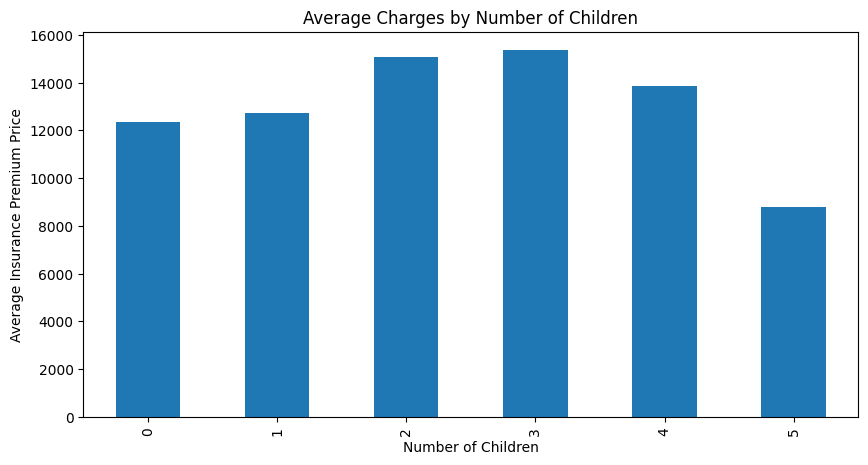

In [ ]:
plt.figure(figsize=(10,5) )
df.groupby(['children'])['charges'].mean().plot.bar()
plt.ylabel('Average Insurance Premium Price')
plt.xlabel('Number of Children')
plt.title("Average Charges by Number of Children")
plt.show()

No significant trend on the average charges by the number of children.

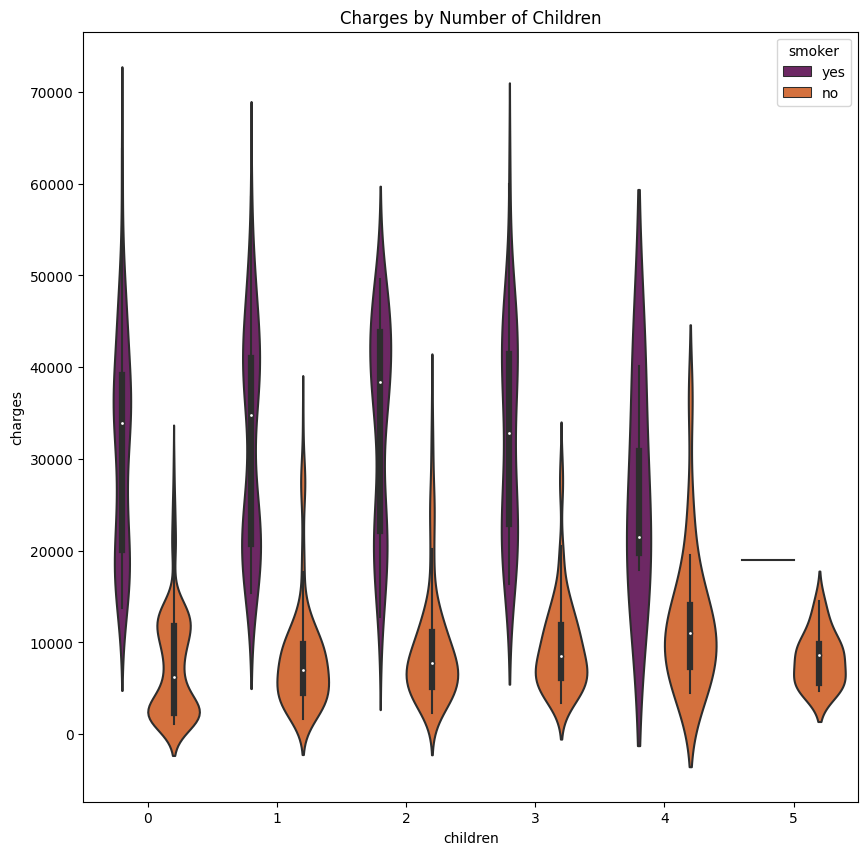

In [44]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.title('Charges by Number of Children')
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                    orient='v', hue='smoker', palette='inferno')

In the violin plot, it shows that people who have 5 children generally smoke less and having the lowest charges.

## Data Pre-processing Section

In [46]:
##Converting object data type into category data type
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [47]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
## Converting category data type into numerical data type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.sex = label.fit_transform(df.sex)
df.smoker = label.fit_transform(df.smoker)
df.region = label.fit_transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [49]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


LabelEncoder use to convert category data type to become numerical data type such as

Female   0
Male     1

Non-Smoker 0
Smoker     1

Northeast  0
Northwest  1
Southeast  2
Southwest  3




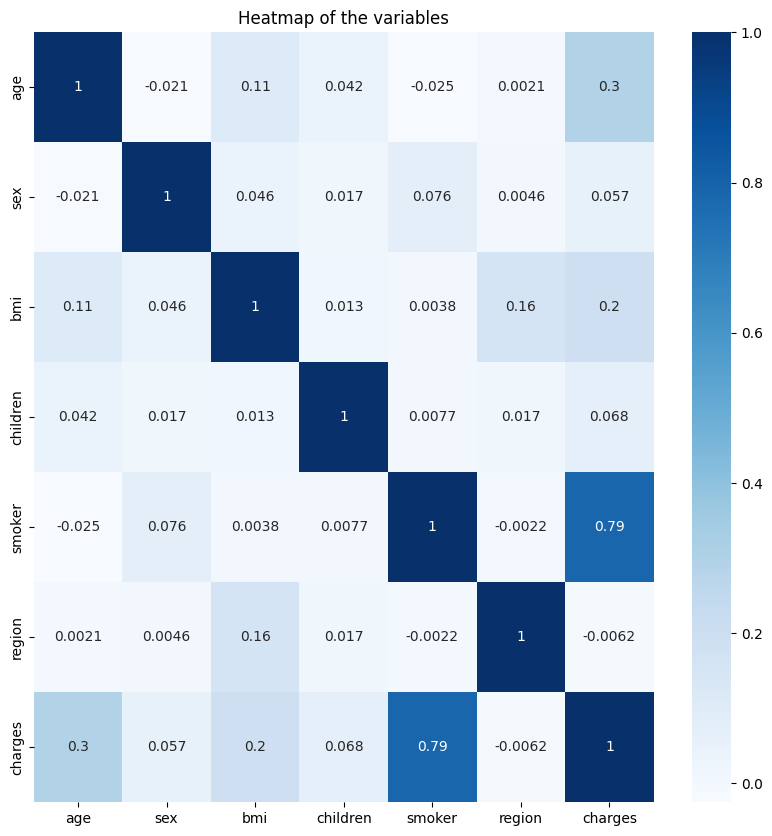

In [52]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.title('Heatmap of the variables')
ax = sns.heatmap(df.corr(), annot=True, cmap='Blues')

No correlation except smoker feature shows a high correlation with the prices.

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['charges'], axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42)

## Regression Implementations

## Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)
Lin_pred = Lin_reg.predict(X_test)

In [ ]:
print('Mean Absolute Error:', round(sm.mean_absolute_error(y_test, Lin_pred),2))
print('Mean Squared Error:', round(sm.mean_squared_error(y_test, Lin_pred),2))
print("Root Mean Squared Error =", round(sm.mean_squared_error(y_test, Lin_pred, squared=False), 2))
print("R2 Score Test Data = " , round(sm.r2_score(y_test,Lin_pred),2))

Mean Absolute Error: 4155.24
Mean Squared Error: 33805466.9
Root Mean Squared Error = 5814.25
R2 Score Test Data =  0.77


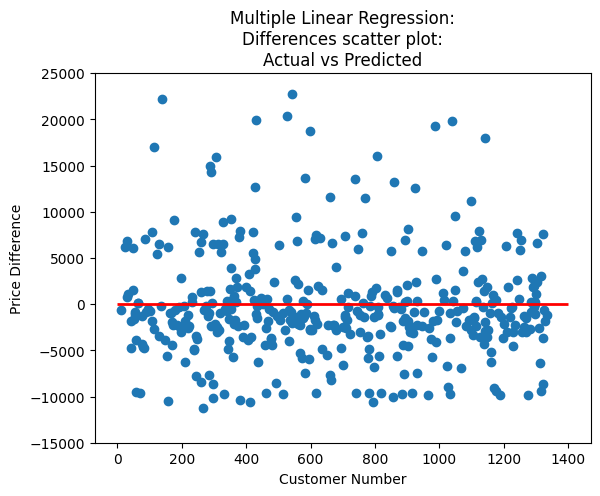

In [ ]:
plt.title('Multiple Linear Regression:\nDifferences scatter plot:\nActual vs Predicted')
plt.ylim(-15000, 25000)
plt.ylabel('Price Difference')
plt.xlabel('Customer Number')
plt.plot(y_test - Lin_pred, marker='o', linestyle='')
plt.hlines(y = 0, xmin = 0, xmax = 1400, lw = 2, color = 'red')

It is visualized that the price differences between actual and predicted are approximately 15000.

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X_train, y_train)
Ridge_pred = Ridge.predict(X_test)

In [ ]:
print('Mean Absolute Error:', round(sm.mean_absolute_error(y_test, Ridge_pred),2))
print('Mean Squared Error:', round(sm.mean_squared_error(y_test, Ridge_pred),2))
print("Root Mean Squared Error =", round(sm.mean_squared_error(y_test, Ridge_pred, squared=False), 2))
print("R2 Score Test Data = " , round(sm.r2_score(y_test,Ridge_pred),2))

Mean Absolute Error: 4167.79
Mean Squared Error: 33839690.23
Root Mean Squared Error = 5817.19
R2 Score Test Data =  0.77


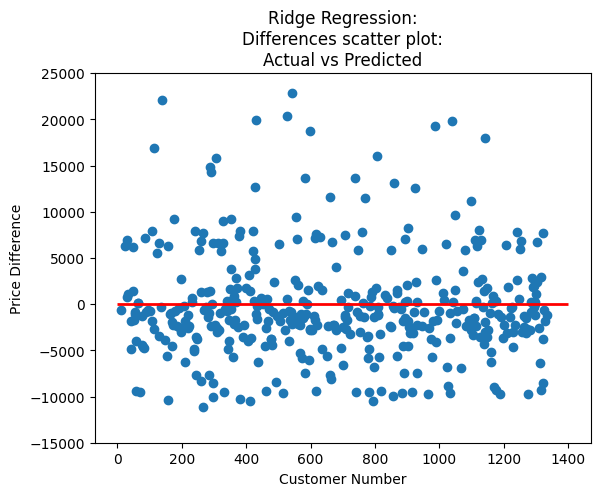

In [ ]:
plt.title('Ridge Regression:\nDifferences scatter plot:\nActual vs Predicted')
plt.ylim(-15000, 25000)
plt.ylabel('Price Difference')
plt.xlabel('Customer Number')
plt.plot(y_test - Ridge_pred, marker='o', linestyle='')
plt.hlines(y = 0, xmin = 0, xmax = 1400, lw = 2, color = 'red')

It is visualized that the price differences between actual and predicted are approximately 15000.

## XGBoost Regressor


In [ ]:
modelXGB = xgb.XGBRegressor(random_state=42) # min_child_weight=10
modelXGB.fit(X_train, y_train)
XGB_pred = modelXGB.predict(X_test)

In [ ]:
print('Mean Absolute Error:', sm.mean_absolute_error(y_test, XGB_pred))
print('Mean Squared Error:', sm.mean_squared_error(y_test, XGB_pred))
print('Root Mean Squared Error:', np.sqrt(sm.mean_squared_error(y_test, XGB_pred)))
print("R2 Score Test Data = " , round(sm.r2_score(y_test,XGB_pred),2))

Mean Absolute Error: 2873.599664210213
Mean Squared Error: 26515250.378591318
Root Mean Squared Error: 5149.2961051576085
R2 Score Test Data =  0.82


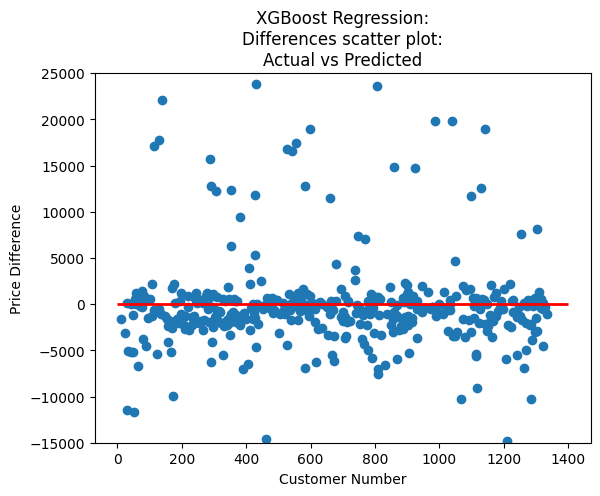

In [ ]:
plt.title('XGBoost Regression:\nDifferences scatter plot:\nActual vs Predicted')
plt.ylim(-15000, 25000)
plt.ylabel('Price Difference')
plt.xlabel('Customer Number')
plt.plot(y_test - XGB_pred, marker='o', linestyle='')
plt.hlines(y = 0, xmin = 0, xmax = 1400, lw = 2, color = 'red')

It is visualized that the price differences between actual and predicted are approximately 5000.

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr

Rfr = rfr(random_state = 42, n_jobs = -1) # -1 to use all processors
Rfr.fit(X_train,y_train)
Rfr_pred = Rfr.predict(X_test)

In [ ]:
print('Mean Absolute Error:', round(sm.mean_absolute_error(Rfr_pred, y_test),2))
print('Mean Squared Error:', round(sm.mean_squared_error(Rfr_pred, y_test),2))
print("Root Mean Squared Error =", round(sm.mean_squared_error(Rfr_pred, y_test, squared=False), 2))
print("R2 Score Test Data = " , round(sm.r2_score(Rfr_pred, y_test),2))

Mean Absolute Error: 2572.27
Mean Squared Error: 21614066.78
Root Mean Squared Error = 4649.09
R2 Score Test Data =  0.85


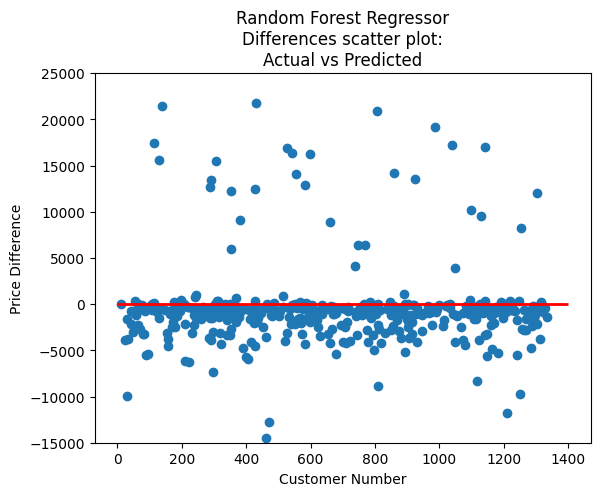

In [ ]:
plt.title('Random Forest Regressor\nDifferences scatter plot:\nActual vs Predicted')
plt.ylim(-15000, 25000)
plt.ylabel('Price Difference')
plt.xlabel('Customer Number')
plt.plot(y_test - Rfr_pred, marker='o', linestyle='')
plt.hlines(y = 0, xmin = 0, xmax = 1400, lw = 2, color = 'red')

It is visualized that the price differences between actual and predicted are approximately 10000.

## Random Forest Regressor with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#warnings.filterwarnings('ignore')
rfr = RandomForestRegressor()
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None,2,3,4,5],
    "max_features": [None,"sqrt","log2"],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}
# small numbers are chosen to prevent time expensive computation

In [ ]:
cv_random = GridSearchCV(rfr, param_grid)
cv_random.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [ ]:
cv_random.best_params_

{'criterion': 'poisson',
 'max_depth': 4,
 'max_features': None,
 'n_estimators': 100}

In [ ]:
rfReg = RandomForestRegressor(n_estimators=100,  max_depth=4, max_features=None, criterion='poisson', random_state=42, n_jobs = -1)
rfReg.fit(X_train,y_train)
gridsearch_pred = rfReg.predict(X_test)

In [ ]:
print('Mean Absolute Error:', round(sm.mean_absolute_error(gridsearch_pred, y_test),2))
print('Mean Squared Error:', round(sm.mean_squared_error(gridsearch_pred, y_test),2))
print("Root Mean Squared Error =", round(sm.mean_squared_error(gridsearch_pred, y_test, squared=False), 2))
print("R2 Score Test Data = " , round(sm.r2_score(gridsearch_pred, y_test),2))

Mean Absolute Error: 2634.14
Mean Squared Error: 19769249.41
Root Mean Squared Error = 4446.26
R2 Score Test Data =  0.86


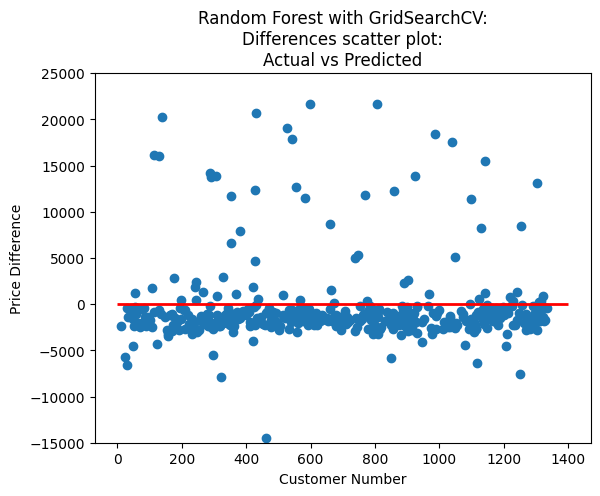

In [ ]:
plt.title('Random Forest with GridSearchCV:\nDifferences scatter plot:\nActual vs Predicted')
plt.ylim(-15000, 25000)
plt.ylabel('Price Difference')
plt.xlabel('Customer Number')
plt.plot(y_test - gridsearch_pred, marker='o', linestyle='')
plt.hlines(y = 0, xmin = 0, xmax = 1400, lw = 2, color = 'red')

It is visualized that the price differences between actual and predicted are approximately 5000.